# Exercício 1 - SME0130 - Redes Complexas

### Aluno: Luciano Augusto Campagnoli da Silva
### Número USP: 9313367

Importar bibliotecas.

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Ler grafos.

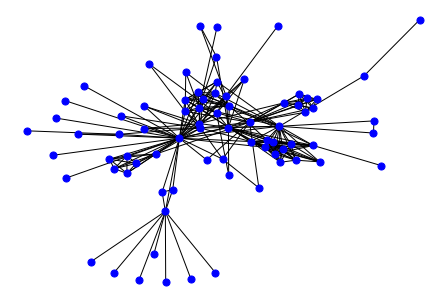

In [2]:
G= nx.read_edgelist("data/data/lesmis.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

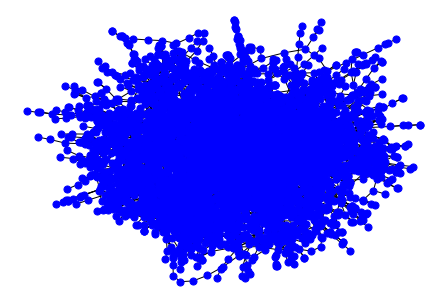

In [31]:
G2= nx.read_edgelist("data/data/powergrid.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G2= G2=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="b", node_size=50, with_labels=False)
G2 = G2.to_undirected()
G2.remove_edges_from(nx.selfloop_edges(G2))
G2cc = sorted(nx.connected_components(G2), key=len, reverse=True)
G2 = G2.subgraph(G2cc[0])
G2 = nx.convert_node_labels_to_integers(G2, first_label=0)

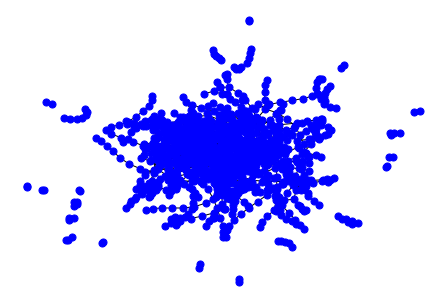

In [28]:
G3= nx.read_edgelist("data/data/euroroad.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G3= G3=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="b", node_size=50, with_labels=False)
G3 = G3.to_undirected()
G3.remove_edges_from(nx.selfloop_edges(G3))
G3cc = sorted(nx.connected_components(G3), key=len, reverse=True)
G3 = G3.subgraph(G3cc[0])
G3 = nx.convert_node_labels_to_integers(G3, first_label=0)

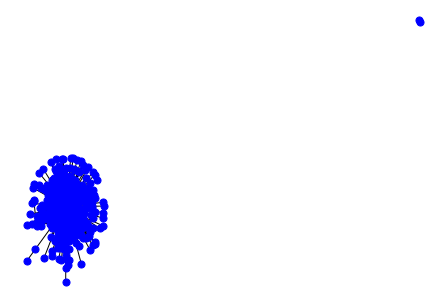

In [29]:
G4= nx.read_edgelist("data/data/usairport.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G4= G4=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G4)
nx.draw(G4, pos, node_color="b", node_size=50, with_labels=False)
G4 = G4.to_undirected()
G4.remove_edges_from(nx.selfloop_edges(G4))
G4cc = sorted(nx.connected_components(G4), key=len, reverse=True)
G4 = G4.subgraph(G4cc[0])
G4 = nx.convert_node_labels_to_integers(G4, first_label=0)

## Questão 1

Cálculos dos momentos.

In [3]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk


In [4]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [5]:
k3 = momment_of_degree_distribution(G,3)
print("Third moment of the degree distribution = ", k3)

k4 = momment_of_degree_distribution(G,4)
print("Fourth moment of the degree distribution = ", k4)

Third moment of the degree distribution =  1408.025974025974
Fourth moment of the degree distribution =  33592.72727272728


Alternativa correta: **e**.

## Questão 2

Cálculo da complexidade.

In [35]:
def complexitiy_coefficient(G):
    return momment_of_degree_distribution(G, 2)/momment_of_degree_distribution(G, 1)

In [36]:
print("Coeficiente de complexidade da rede: ", complexitiy_coefficient(G2))

Coeficiente de complexidade da rede:  3.8712465878070974


Alternativa correta: **b**.

## Questão 3

Cálculo da entropia de Shannon.

In [37]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [38]:
H = shannon_entropy(G3)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  2.0037


Alternativa correta: **e**.

## Questão 4

Cálculo da transitividade.

In [39]:
CC = (nx.transitivity(G4)) 
print("Transitivity = ","%3.4f"%CC)

Transitivity =  0.3841


Cálculo do coeficiente médio de aglomeração.

In [40]:
avc = nx.average_clustering(G4)
print("Average clustering:", "%3.4f"%avc)

Average clustering: 0.5048


Alternativa correta: **e**.

## Questão 5

Cálculo do coeficiente de complexidade (rede de aeroportos dos Estados Unidos).

In [42]:
print("Coeficiente de complexidade da rede: ", complexitiy_coefficient(G4))

Coeficiente de complexidade da rede:  112.22870919019402


Cálculo da entropia de Shannon da rede (rede de aeroportos dos Estados Undidos).

In [41]:
H4 = shannon_entropy(G4)
print("Shannon Entropy = ", "%3.4f"%H4)

Shannon Entropy =  4.9894


Alternativa correta: **d**.